# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
1) Linear Regression:
- find the relationship between output(y) between one or more inputs(x1, x2, ..., xn) using liearn model
- model using linear function: y = a1x1 + a2x2 + ... + anxn where vector (a1, ..., an) are etimated from the samples
- often uses root mean squared error (RMSE) to estimate the vector

2) Polynomial Regression:
- find the relationship between output(y) and inputs(x, x^2, x^3, ..., x^n)
- model using linear function: y = w1x + w2(x^2) + ... + wn(x^n), where (x, x^2, ..., x^n) is the inputs matrix and (w1, w2, ..., wn) is weights matrix

3) Overfitting:
- use of too complex model to describe the dataset

4) Underfitting:
- the model is too simple to capture the underlying of the dataset

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
1) Logistic Regression:
- used to categorize output(y) into two categories based on one or many input features
- activate function is logit function f(wT.x) = 1/(1 + exp(-wT.x), which returns values between 1 and -1
- use to predict the probabilities of each output to each categories

2) Linear SVM:
- an algorithm to classify data
- find the boundaries that classify the training data
- pick the boundary that has greatest distances to the points closest to it
- the closest points indentify this boundary are called support vectors
- the region between the boundary and the closet points is the margin
- SVM only works if data is linearly seperatable. However, real world dataset often contains some samples that does not satisfy this condition. We can still use SVM that accepts some errors. Slack variables are distances from incorrect samples to the margin's boundaries and these variables are used for errors. The larger the errors, the wider the margin

![alt text](svm.png "Title")

- Sometime, the data is not linear seperatable in two dimensional world but is seperatable in higher dimensional world. Then we need to transform each data points from one world to another. For example, A(x1, x2) --> A(x1^2, x2^2, x1*x2), which is the implementation of transforming A from a plane to a space.In practice, we use kernel, which is a function, to make the data transformation.

# Xor dataset: linear kernel does not work

![alt text](xor.png "Title")

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

In [14]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

1) Supervised vs Unsupervised Learning:
- In supervised learning, ouput samples are mapped to known labels (ex: map emails to spam and non-spam)
- In unsupervised learning, the labels and unknown and have to be determined from the data

2) K-NN (a lazy learning algorithm):
- K-NN is lazy because it does not use the data to fix a model function that output the pridicted values, which is the strategy of other algorithms such as logistic regression or svm. Instead, we input a data point and the model will find K data points that are closest to the point we provided and predict the output for that point based on its neighbors.
- A use case would be a recommendation system. Data arrives continously and are compared to known data.

3) Implement k-NN:
- initialize k (# of neighbors)
- for each training data point:
    - calculate the distance between this point and other training points
    - sort the distances
    - take k mose smallest distances
    - get the most frequent class
    - return the class

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [24]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [27]:
# initilize k
k = 6

# implement algorithm
def knn(test):
    # copy data to a new datafram
    train = iris_df.copy()
    train['distance'] = pd.Series(np.zeros(train.shape[0])) # create a new column to hold the distances
    train.columns = pd.Index([1,2,3,4, 'target', 'distance']) # rename indexes
    
    for i in range(4):
        # calculate distance using Euclidian distance
        train[i+1] = (train[i+1] - test[i])**2
        train['distance'] += train[i+1]
    
    # take the square root
    train['distance'] = pd.Series(np.sqrt(train['distance']))
    
    #sort the distances
    train.sort_values('distance', inplace=True)
    target = train['target'].tolist()
    # grasp k nearest neighbors
    classes = [0,0,0]
    for i in range(k):
        if(target[i] == 0): classes[0] += 1
        elif(target[i] == 1):classes[1] += 1
        else:classes[2] +=1
    
    return classes

# find the classes with highest possibility
def predict(classes):
    print(classes)
    index = classes.index(max(classes))
    if(index==0): return 'Setosa'
    elif(index==1): return 'Versicolor'
    else: return 'Virginica'

print(predict(knn([5.7, 2.8, 4.1, 1.3])))
print(predict(knn([6.3, 2.5, 5.0, 1.9])))

[0, 6, 0]
Versicolor
[0, 2, 4]
Virginica


### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

In [ ]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

Ensemble methods combine several dicision trees to produce better performance than single dicision tree. Two techniques to implent ensemble dicision trees are bagging and boosting.

1) Bagging: (Bootstrap aggregation)
- create several subsets of data from training sample chosen randomly with replacement
- each collection of subset data is used to train their decision trees
- each models is trained independently
- average of all the predictions from different trees are used to make the final predictions
- suitable for high variance low bias models

2) Boosting: 
- also create several subsets of data from training sample
- each models is now trained sequentially
- each model will generate better weights for the next model
- suitable for low variance high bias models

![alt text](b&b1.png "Title")
![alt text](b&b2.png "Title")

3) Decision tree:
- use sequential questions to make certain route given the answers
- props:
    - easy to interpret and straightforward
    - fast
    - The internal workings are capable of being observed and thus make it possible to reproduce work
- cons:
    - prone to overfitting, especially when the tree is deep because of the amount of specificity we look at each node
    - optimal decision may not be reached since at each step the algorithm chooses the best results. (best results for each step may not head down to right result)
    - 

4) Random forest:
- random forest is a collection of different dicision trees. 
- it first create a collection of dataset from training sample and choose random features for each set 
- props:
    - reduce bias
    - reduce error due to variance
- cons:
    - if features are not chosen randomly, base trees could become highly correlated
    - if same features are chosen for each model, then we will not reduce the error due to variance

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

In [18]:
## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

1) PCA:
- the idea is to convert sample xi with m features(xi(1), xi(2), ..., xi(m)) to n feautures(xi(1), ..., xi(n)) where n < m
- algorithm:
    - we first subtract the mean from input matrix X
    - we then compute the covariance matrix sigma = (X.T).X
    - we then find n eigenvalues correspoding to n eigen vectors (use cross validation)
    - we combine all eigen vectors to make the transform matrix W
- since PCA is a model without intercept, we need to center the data around 0

2) Autoencoder:
- is a type of neural net to learn the representation of th dataset by ignoring noise
- while PCA tries to compress the data, autoencoder try to learn the main representation of the data by removing noise, thus it is better at representing original data


### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [29]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [64]:
set(y)
X.shape

(1288, 1850)

In [65]:
print(w)
print(h)

37
50


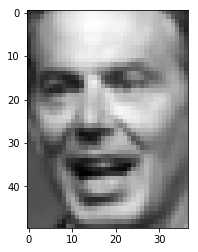

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')

### insert your code here ###



In [51]:
# center the data
X_average_row = np.average(X, axis=0)
X_bar = X - X_average_row

# compute the covariance matrix
sigma = X_bar.T.dot(X_bar)

# compute the eigen values
eigenvalues, _ = np.linalg.eig(sigma)

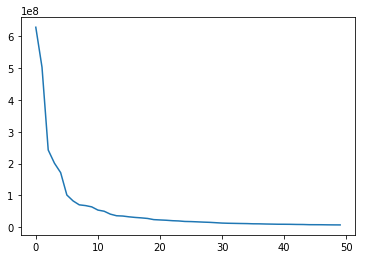

In [56]:
# show the eigen values
plt.plot(np.arange(50), eigenvalues[:50])

In [80]:
# reduce features
from sklearn.decomposition import PCA

pca = PCA(n_components=50) 
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [81]:
# transform the data
X_trans = pca.transform(X)
X_trans.shape

(1288, 50)

In [82]:
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)


(901, 50)
(387, 50)


In [83]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(C=0.1, multi_class='multinomial', solver='saga', tol=0.1)
log_model.fit(X_train, y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.1, verbose=0, warm_start=False)

In [86]:
from sklearn.metrics import accuracy_score

print('train acc: ', accuracy_score(log_model.predict(X_train), y_train))
print('test acc: ', accuracy_score(log_model.predict(X_test), y_test))

train acc:  0.8379578246392897
test acc:  0.7493540051679587


## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [60]:
### your code below ###

